In [650]:
import numpy as np 
import pandas as pd 


import os
from pmdarima.arima import auto_arima
import psycopg2 as pg

import pandas.io.sql as pd_sql
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, mean_absolute_error

In [651]:
import psycopg2 as pg

connection_args = {
    'host': 'localhost',  # We are connecting to our _local_ version of psql
    'dbname': 'names',    # DB that we are connecting to
    'port': 5432          # port for psql
}

# We will talk about this magic Python trick!
connection = pg.connect(**connection_args)
from sqlalchemy import create_engine
engine = create_engine('postgresql://hansremy:Hryr1321@@localhost:5432/Project5')

In [652]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [653]:
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics

In [654]:
rootPathSourceData = './Data/smart-meters-in-london/'

## Getting weather data

In [655]:
weatherHourlyPath = rootPathSourceData + 'weather_hourly_darksky.csv'
df_weatherHourly = pd.read_csv(weatherHourlyPath, header=0, sep=',')

In [656]:
df_weatherHourly

,visibility,windBearing,temperature,time,dewPoint,pressure,apparentTemperature,windSpeed,precipType,icon,humidity,summary
0,5.97,104,10.24,2011-11-11 00:00:00,8.86,1016.76,10.24,2.77,rain,partly-cloudy-night,0.91,Partly Cloudy
1,4.88,99,9.76,2011-11-11 01:00:00,8.83,1016.63,8.24,2.95,rain,partly-cloudy-night,0.94,Partly Cloudy
2,3.70,98,9.46,2011-11-11 02:00:00,8.79,1016.36,7.76,3.17,rain,partly-cloudy-night,0.96,Partly Cloudy
3,3.12,99,9.23,2011-11-11 03:00:00,8.63,1016.28,7.44,3.25,rain,fog,0.96,Foggy
4,1.85,111,9.26,2011-11-11 04:00:00,9.21,1015.98,7.24,3.70,rain,fog,1.00,Foggy
...,...,...,...,...,...,...,...,...,...,...,...,...
21160,12.68,247,7.39,2014-02-15 19:00:00,3.06,997.07,3.91,6.08,rain,partly-cloudy-night,0.74,Partly Cloudy
21161,13.78,249,6.56,2014-02-15 20:00:00,2.76,998.15,3.03,5.61,rain,clear-night,0.77,Clear
21162,14.31,248,6.47,2014-02-15 21:00:00,2.71,999.28,3.06,5.25,rain,clear-night,0.77,Clear
21163,14.31,248,5.96,2014-02-15 22:00:00,2.69,1000.33,2.68,4.69,rain,clear-night,0.80,Clear


In [657]:
# Postgres info to connect
'''
connection_args = {
    'host': 'localhost',  # We are connecting to our _local_ version of psql
    'dbname': 'names',    # DB that we are connecting to
    'port': 5432          # port for psql
}

# We will talk about this magic Python trick!
connection = pg.connect(**connection_args)
from sqlalchemy import create_engine
engine = create_engine('postgresql://hansremy:Hryr1321@@localhost:5432/Project5')
df_weatherHourly.to_sql('WeatherHourly', engine)
'''

"\nconnection_args = {\n    'host': 'localhost',  # We are connecting to our _local_ version of psql\n    'dbname': 'names',    # DB that we are connecting to\n    'port': 5432          # port for psql\n}\n\n# We will talk about this magic Python trick!\nconnection = pg.connect(**connection_args)\nfrom sqlalchemy import create_engine\nengine = create_engine('postgresql://hansremy:Hryr1321@@localhost:5432/Project5')\ndf_weatherHourly.to_sql('WeatherHourly', engine)\n"

In [658]:
#df_Adversity = pd.read_pickle(('./Data/AdversityGroup.pkl') )
#df_Affluent = pd.read_pickle(('./Data/AffluentGroup.pkl') )
#df_Comfortable = pd.read_pickle(('./Data/ComfortableGroup.pkl') )

## Getting data from Postgress SQL

In [659]:
df_Adversity = pd.read_sql_table('Adversity',engine)
df_Affluent = pd.read_sql_table('Affluent',engine)
df_Comfortable = pd.read_sql_table('Comfortable',engine)

#df_Adversity.drop('index',axis=1,inplace=True)
#df_Affluent.drop('index',axis=1,inplace=True)
#df_Comfortable.drop('index',axis=1,inplace=True)

In [660]:
df_All = pd.read_sql_table('All',engine)

In [661]:
df_Affluent.dropna(inplace=True)
df_Adversity.dropna(inplace=True)
df_Comfortable.dropna(inplace=True)

In [662]:
df_All.dropna(inplace=True)

In [663]:
df_Affluent

,tstp,energy,temperature
647,2011-11-23 10:30:00.0000000,0.12700,4.24
648,2011-11-23 11:30:00.0000000,0.56400,5.94
649,2011-11-23 12:30:00.0000000,0.77033,7.25
650,2011-11-23 13:30:00.0000000,0.29450,8.29
651,2011-11-23 14:30:00.0000000,0.35425,10.36
...,...,...,...
40363,2014-02-27 20:00:00.0000000,0.40977,3.47
40364,2014-02-27 21:00:00.0000000,0.39611,2.50
40365,2014-02-27 22:00:00.0000000,0.36022,1.41
40366,2014-02-27 23:00:00.0000000,0.30251,1.42


In [664]:
df_ukHoliday = pd.read_sql_table('UKHoliday',engine)

In [665]:
df_ukHoliday

,Description,Date
0,Boxing Day,2012-12-26
1,Christmas Day,2012-12-25
2,Summer bank holiday,2012-08-27
3,Queen?s Diamond Jubilee (extra bank holiday),2012-05-06
4,Spring bank holiday (substitute day),2012-04-06
5,Early May bank holiday,2012-07-05
6,Easter Monday,2012-09-04
7,Good Friday,2012-06-04
8,New Year?s Day (substitute day),2012-02-01
9,Boxing Day,2013-12-26


In [666]:
df_ukHoliday['Date'] = pd.to_datetime(df_ukHoliday['Date'])

In [667]:
df_ukHoliday

,Description,Date
0,Boxing Day,2012-12-26
1,Christmas Day,2012-12-25
2,Summer bank holiday,2012-08-27
3,Queen?s Diamond Jubilee (extra bank holiday),2012-05-06
4,Spring bank holiday (substitute day),2012-04-06
5,Early May bank holiday,2012-07-05
6,Easter Monday,2012-09-04
7,Good Friday,2012-06-04
8,New Year?s Day (substitute day),2012-02-01
9,Boxing Day,2013-12-26


In [668]:
def makeHolidayDFProphet(df_Holiday):
    df = df_Holiday.groupby('Description')['Date'].apply(list)
    df = df_Holiday.groupby('Description')['Date'].apply(list).reset_index(name='ds')
    
  
    return df

In [669]:
df_Holidays = makeHolidayDFProphet(df_ukHoliday)

In [670]:
df_Holidays

,Description,ds
0,Boxing Day,"[2012-12-26 00:00:00, 2013-12-26 00:00:00, 201..."
1,Christmas Day,"[2012-12-25 00:00:00, 2013-12-25 00:00:00, 201..."
2,Early May bank holiday,"[2012-07-05 00:00:00, 2013-06-05 00:00:00, 201..."
3,Easter Monday,"[2012-09-04 00:00:00, 2013-01-04 00:00:00, 201..."
4,Good Friday,"[2012-06-04 00:00:00, 2013-03-29 00:00:00, 201..."
5,New Year?s Day,"[2013-01-01 00:00:00, 2014-01-01 00:00:00]"
6,New Year?s Day (substitute day),[2012-02-01 00:00:00]
7,Queen?s Diamond Jubilee (extra bank holiday),[2012-05-06 00:00:00]
8,Spring bank holiday,"[2013-05-27 00:00:00, 2014-05-26 00:00:00]"
9,Spring bank holiday (substitute day),[2012-04-06 00:00:00]


In [671]:
df_Holidays.columns = ['holiday', 'ds']

## Setting index and datetime

In [672]:
#df_Adversity = df_Adversity.set_index("tstp")
#df_Affluent = df_Affluent.set_index("tstp")
#df_Comfortable = df_Comfortable.set_index("tstp")
df_Adversity.index = df_Adversity.tstp.astype('datetime64[ns]')
df_Affluent.index = df_Affluent.tstp.astype('datetime64[ns]')
df_Comfortable.index = df_Comfortable.tstp.astype('datetime64[ns]')
df_All.index = df_All.tstp.astype('datetime64[ns]')

In [673]:
df_Adversity = df_Adversity[df_Adversity["energy"] != "Null"]
df_Adversity["energy"] = df_Adversity["energy"].astype("float64")
df_Affluent = df_Affluent[df_Affluent["energy"] != "Null"]
df_Affluent["energy"] = df_Affluent["energy"].astype("float64")
df_Comfortable = df_Comfortable[df_Comfortable["energy"] != "Null"]
df_Comfortable["energy"] = df_Comfortable["energy"].astype("float64")
df_All = df_All[df_All["energy"] != "Null"]
df_All["energy"] = df_All["energy"].astype("float64")

/Users/hansremy/opt/anaconda3/envs/metis/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



In [674]:
def makeFeatures(df):
    
    def makeTimeFrame(hour):
        if hour in [23,0,1,2,3,4,5]:
            return 'Night'
        elif hour in [6,7,8,9,10,11]:
            return 'Morning'
        elif hour in [12,13,14,15,16,17]:
            return 'Midday'
        elif hour in [18,19,20,21,22]:
            return 'Evening'
    """
    Creates time series features from datetime index.
    """
    df = df.copy()
    df['date'] = df.index
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.weekofyear
    df['Time of day'] = df.hour.map(makeTimeFrame)
    
    df_ret = df[['energy','temperature','hour','dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear','Time of day']]
    return df_ret

In [675]:
df_Comfortable

,tstp,energy,temperature
tstp,,,
2011-11-23 09:30:00,2011-11-23 09:30:00.0000000,0.41400,3.42
2011-11-23 10:30:00,2011-11-23 10:30:00.0000000,0.09950,4.24
2011-11-23 11:30:00,2011-11-23 11:30:00.0000000,0.13340,5.94
2011-11-23 12:30:00,2011-11-23 12:30:00.0000000,0.11020,7.25
2011-11-23 13:30:00,2011-11-23 13:30:00.0000000,0.18500,8.29
...,...,...,...
2014-02-27 20:00:00,2014-02-27 20:00:00.0000000,0.33923,3.47
2014-02-27 21:00:00,2014-02-27 21:00:00.0000000,0.32581,2.50
2014-02-27 22:00:00,2014-02-27 22:00:00.0000000,0.29109,1.41


## Plotting and exploring consumption per group

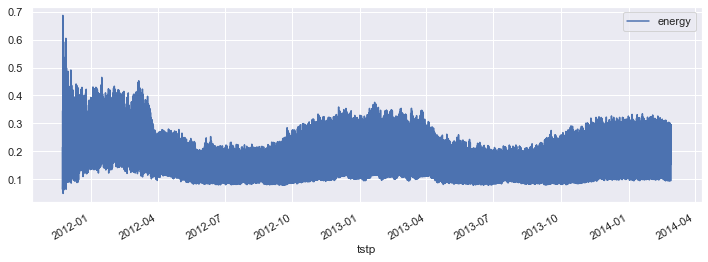

In [676]:
df_Adversity.plot(y="energy", figsize=(12, 4))

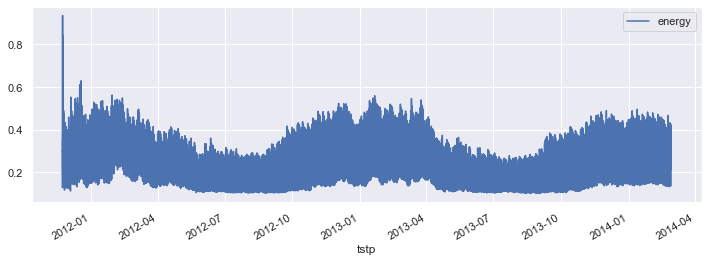

In [677]:
df_Affluent.plot(y="energy", figsize=(12, 4))

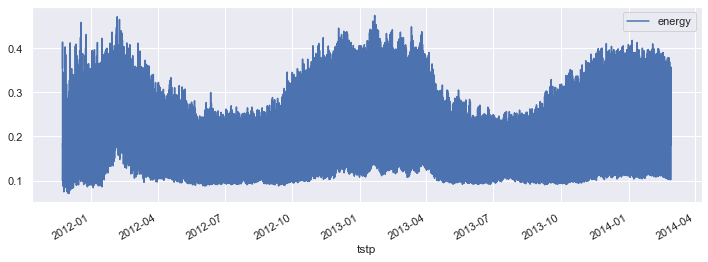

In [678]:
df_Comfortable.plot(y="energy", figsize=(12, 4))

In [679]:
print(df_Adversity)

                                            tstp   energy  temperature
tstp                                                                  
2011-11-23 09:30:00  2011-11-23 09:30:00.0000000  0.14700         3.42
2011-11-23 10:30:00  2011-11-23 10:30:00.0000000  0.06300         4.24
2011-11-23 11:30:00  2011-11-23 11:30:00.0000000  0.12000         5.94
2011-11-23 12:30:00  2011-11-23 12:30:00.0000000  0.08950         7.25
2011-11-23 13:30:00  2011-11-23 13:30:00.0000000  0.34500         8.29
...                                          ...      ...          ...
2014-02-27 19:30:00  2014-02-27 19:30:00.0000000  0.28950         3.99
2014-02-27 20:30:00  2014-02-27 20:30:00.0000000  0.28014         3.47
2014-02-27 21:30:00  2014-02-27 21:30:00.0000000  0.25358         2.50
2014-02-27 22:30:00  2014-02-27 22:30:00.0000000  0.22791         1.41
2014-02-27 23:30:00  2014-02-27 23:30:00.0000000  0.17387         1.42

[39723 rows x 3 columns]


In [680]:

df_Affluent =  makeFeatures(df_Affluent)
df_Comfortable =  makeFeatures(df_Comfortable)
df_Adversity =  makeFeatures(df_Adversity)
df_All =  makeFeatures(df_All)



In [681]:
df_Affluent

,energy,temperature,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,Time of day
tstp,,,,,,,,,,,
2011-11-23 10:30:00,0.12700,4.24,10,2,4,11,2011,327,23,47,Morning
2011-11-23 11:30:00,0.56400,5.94,11,2,4,11,2011,327,23,47,Morning
2011-11-23 12:30:00,0.77033,7.25,12,2,4,11,2011,327,23,47,Midday
2011-11-23 13:30:00,0.29450,8.29,13,2,4,11,2011,327,23,47,Midday
2011-11-23 14:30:00,0.35425,10.36,14,2,4,11,2011,327,23,47,Midday
...,...,...,...,...,...,...,...,...,...,...,...
2014-02-27 20:00:00,0.40977,3.47,20,3,1,2,2014,58,27,9,Evening
2014-02-27 21:00:00,0.39611,2.50,21,3,1,2,2014,58,27,9,Evening
2014-02-27 22:00:00,0.36022,1.41,22,3,1,2,2014,58,27,9,Evening


In [682]:
def makePairPlot(df,title,fileName=''):
    pp = sns.pairplot(df.dropna(),
                 hue='hour',
                 x_vars=['hour','dayofweek',
                         'weekofyear'],
                 y_vars='energy',
                 height=5,
                 plot_kws={'alpha':0.15, 'linewidth':0}
                )
    
    
    # 1st plot
    pp.axes[0,0].set_xlabel('Hour of day')
    pp.axes[0,0].set_ylabel('energy kWh (per half hour)')
    pp.axes[0,0].set_ylim([0, 0.8])  

    # 2nd plot
    pp.axes[0,1].set_xlabel('Day of week')
    pp.axes[0,1].set_ylim([0, 0.8])  

    # 3rd plot
    pp.axes[0,2].set_xlabel('Week of year')
    pp.axes[0,2].set_ylim([0, 0.8])
    plt.suptitle(title)
    if fileName:
        plt.savefig(fileName, dpi=160)
    
    plt.show()

In [571]:
def makePairPlotNew(df,title,fileName=''):
    pp = sns.pairplot(df.dropna(),
                 hue='Time of day',
                 x_vars=['Time of day','dayofweek',
                         'weekofyear'],
                 y_vars='energy',
                 height=5,
                 plot_kws={'alpha':0.15, 'linewidth':0}
                )
    
    
    # 1st plot
    pp.axes[0,0].set_xlabel('Time of day')
    pp.axes[0,0].set_ylabel('energy kWh (per half hour)')
    pp.axes[0,0].set_ylim([0, 0.8])  

    # 2nd plot
    pp.axes[0,1].set_xlabel('Day of week')
    pp.axes[0,1].set_ylim([0, 0.8])  

    # 3rd plot
    pp.axes[0,2].set_xlabel('Week of year')
    pp.axes[0,2].set_ylim([0, 0.8])
    plt.suptitle(title)
    if fileName:
        plt.savefig(fileName, dpi=160)
    
    plt.show()

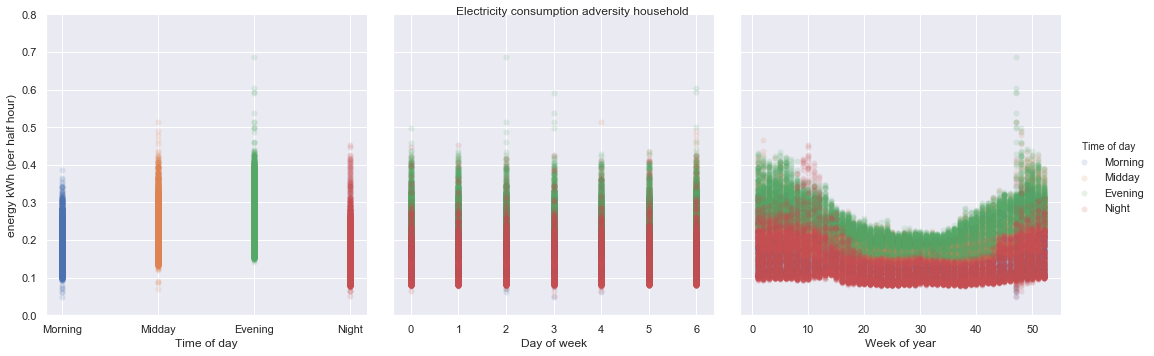

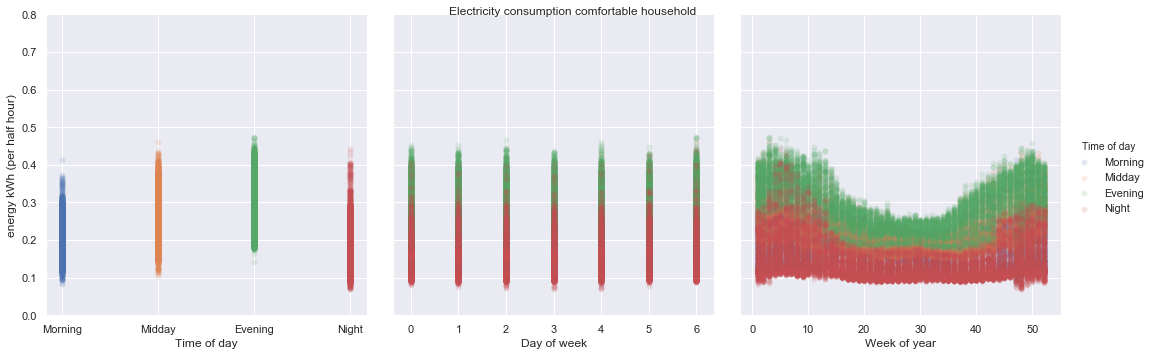

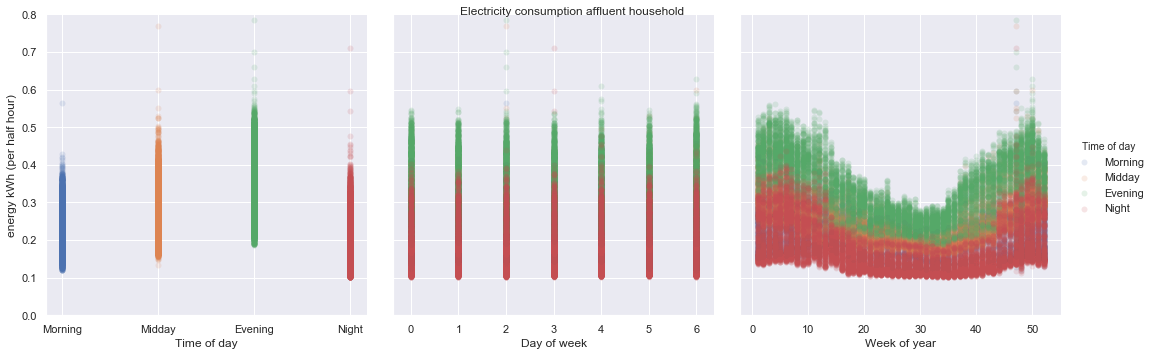

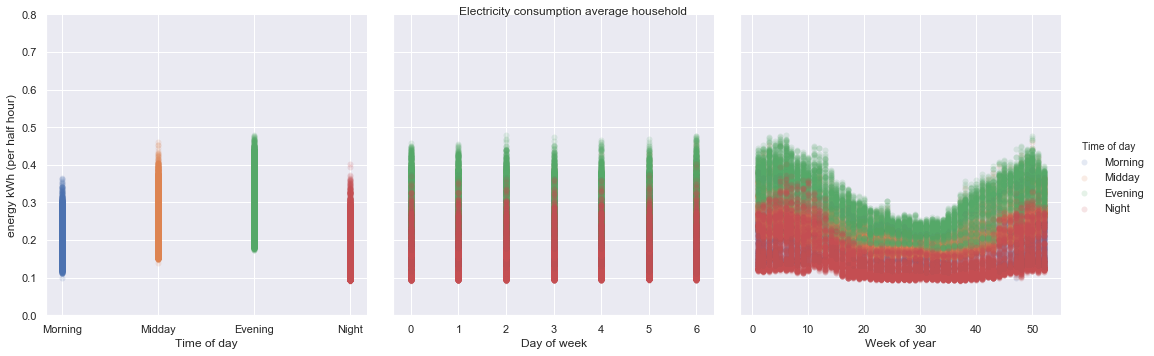

In [683]:
makePairPlotNew(df_Adversity, 'Electricity consumption adversity household','consump_AdversitytimeScale.png')
makePairPlotNew(df_Comfortable, 'Electricity consumption comfortable household','consump_ComfortabletimeScale.png')
makePairPlotNew(df_Affluent, 'Electricity consumption affluent household','consump_AffluenttimeScale.png')
makePairPlotNew(df_All, 'Electricity consumption average household','consump_AlltimeScale.png')

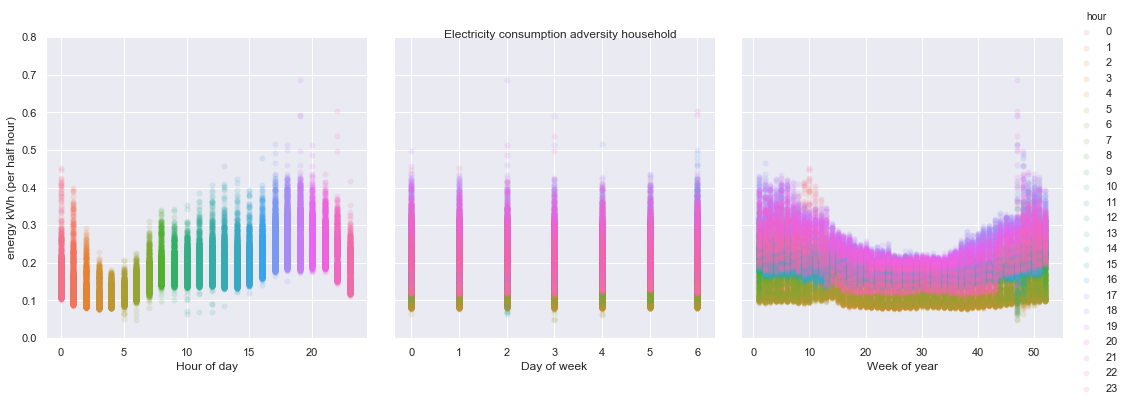

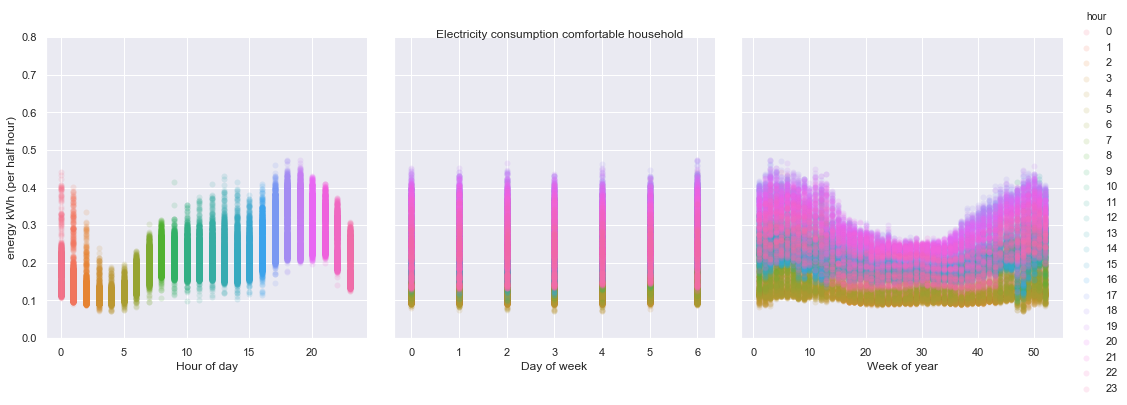

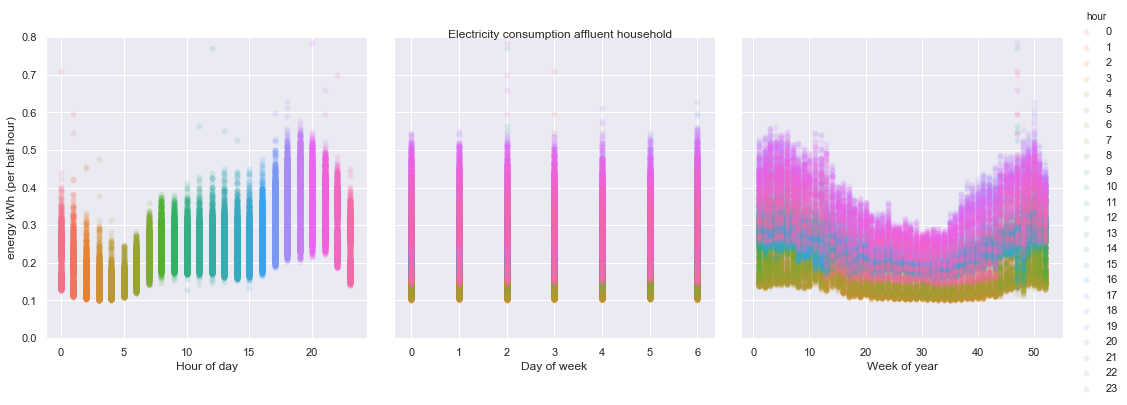

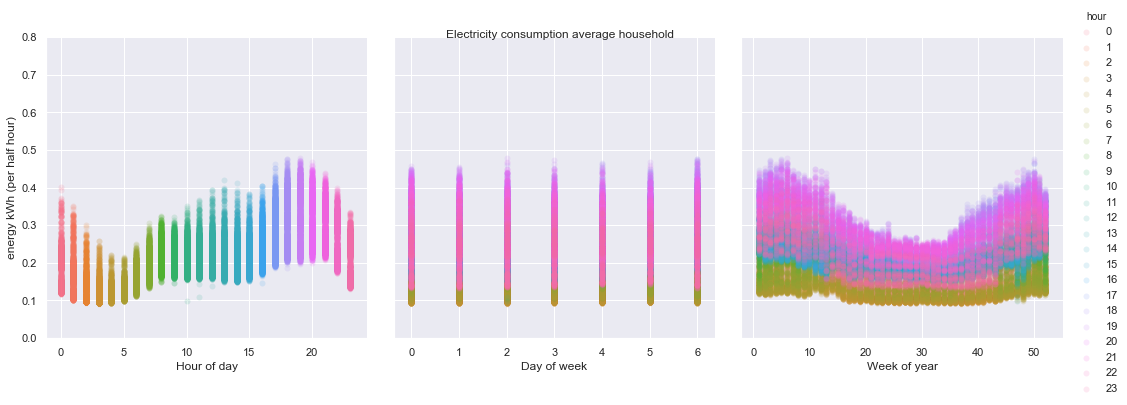

In [684]:
makePairPlot(df_Adversity, 'Electricity consumption adversity household','consump_Adversity.png')
makePairPlot(df_Comfortable, 'Electricity consumption comfortable household','consump_Comfortable.png')
makePairPlot(df_Affluent, 'Electricity consumption affluent household','consump_Affluent.png')
makePairPlot(df_All, 'Electricity consumption average household','consump_All.png')

In [685]:
df_All = df_All.sort_values(by=['tstp'])
df_Adversity = df_Adversity.sort_values(by=['tstp'])
df_Comfortable = df_Comfortable.sort_values(by=['tstp'])
df_Affluent = df_Affluent.sort_values(by=['tstp'])

In [686]:
print(df_All.head(5))
print(df_All.tail(5))

                      energy  temperature  hour  dayofweek  quarter  month  \
tstp                                                                         
2011-11-23 09:00:00  0.28450         3.42     9          2        4     11   
2011-11-23 09:30:00  0.28050         3.42     9          2        4     11   
2011-11-23 10:00:00  0.15333         4.24    10          2        4     11   
2011-11-23 10:30:00  0.09800         4.24    10          2        4     11   
2011-11-23 11:00:00  0.11029         5.94    11          2        4     11   

                     year  dayofyear  dayofmonth  weekofyear Time of day  
tstp                                                                      
2011-11-23 09:00:00  2011        327          23          47     Morning  
2011-11-23 09:30:00  2011        327          23          47     Morning  
2011-11-23 10:00:00  2011        327          23          47     Morning  
2011-11-23 10:30:00  2011        327          23          47     Morning  
201

In [406]:
dfAllFilt = df_All.loc['2014-01-01':'2014-02-01']

In [407]:
dfAllFilt

,energy,temperature,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
tstp,,,,,,,,,,
2014-01-01 00:00:00,0.25901,4.43,0,2,1,1,2014,1,1,1
2014-01-01 00:30:00,0.24506,4.43,0,2,1,1,2014,1,1,1
2014-01-01 01:00:00,0.22785,3.55,1,2,1,1,2014,1,1,1
2014-01-01 01:30:00,0.21053,3.55,1,2,1,1,2014,1,1,1
2014-01-01 02:00:00,0.19084,3.18,2,2,1,1,2014,1,1,1
...,...,...,...,...,...,...,...,...,...,...
2014-02-01 21:30:00,0.31918,3.34,21,5,1,2,2014,32,1,5
2014-02-01 22:00:00,0.30430,3.27,22,5,1,2,2014,32,1,5
2014-02-01 22:30:00,0.28628,3.27,22,5,1,2,2014,32,1,5


## Making Prophet model

In [720]:
def MakeProphetModel(df):
    # Make training size from 
    
    
    
    df = df[['energy','temperature']] 
    df['ds']=df.index
    X_train = df.loc['2012-01-01':'2013-12-31'].copy()
    X_test = df.loc['2014-01-01':'2014-12-31'].copy()
    y_train = X_train['energy'].copy()
    y_test = X_test['energy'].copy()
    
    X_train.columns = ['y','temperature','ds']
    X_test.columns = ['y','temperature','ds']
    
    model = Prophet(yearly_seasonality=True,daily_seasonality=True,weekly_seasonality=True)
    
    model.add_regressor('temperature')
    model.fit(X_train)
    
    
    return model,X_train, X_test

In [421]:
'''
def MakeProphetModelBack(df):
    train_size = int(0.8 * len(df))
    dfy = df['energy']
    dfX = df.drop('energy',1)
    #X_train, X_test, y_train, y_test = train_test_split(dfX, dfy, test_size=0.8)
    X_train, X_test = df[:train_size].drop('energy',1), df[train_size:].drop('energy',1)
    
    y_train, y_test = df[:train_size]["energy"].values, df[train_size:]["energy"].values
    #train_df = pd.concat([pd.Series(X_train), pd.Series(y_train)], axis=1, keys=["ds", "y","temperature"])
    #test_df = pd.concat([pd.Series(X_test), pd.Series([0]*len(y_test))], axis=1, keys=["ds", "y","temperature"])
    train_df = pd.concat([pd.Series(X_train), pd.Series(y_train)], axis=1)
    test_df = pd.concat([pd.Series(X_test), pd.Series([0]*len(y_test))], axis=1)
    answer_df = pd.concat([pd.Series(X_test), pd.Series(y_test)], axis=1, keys=["ds", "y"])
    model = Prophet(yearly_seasonality=True)
    print(X_train)
    print(train_df)
    model.add_seasonality(name="monthly", period=30.5, fourier_order=5)
    model.add_regressor('temperature')
    model.fit(train_df)
    
    return model,train_df,test_df,answer_df
'''

'\ndef MakeProphetModelBack(df):\n    train_size = int(0.8 * len(df))\n    dfy = df[\'energy\']\n    dfX = df.drop(\'energy\',1)\n    #X_train, X_test, y_train, y_test = train_test_split(dfX, dfy, test_size=0.8)\n    X_train, X_test = df[:train_size].drop(\'energy\',1), df[train_size:].drop(\'energy\',1)\n    \n    y_train, y_test = df[:train_size]["energy"].values, df[train_size:]["energy"].values\n    #train_df = pd.concat([pd.Series(X_train), pd.Series(y_train)], axis=1, keys=["ds", "y","temperature"])\n    #test_df = pd.concat([pd.Series(X_test), pd.Series([0]*len(y_test))], axis=1, keys=["ds", "y","temperature"])\n    train_df = pd.concat([pd.Series(X_train), pd.Series(y_train)], axis=1)\n    test_df = pd.concat([pd.Series(X_test), pd.Series([0]*len(y_test))], axis=1)\n    answer_df = pd.concat([pd.Series(X_test), pd.Series(y_test)], axis=1, keys=["ds", "y"])\n    model = Prophet(yearly_seasonality=True)\n    print(X_train)\n    print(train_df)\n    model.add_seasonality(name="mon

In [721]:
modelAdv, train_dfAdv,test_dfAdv = MakeProphetModel(df_Adversity)
modelComf, train_dfComf,test_dfComf = MakeProphetModel(df_Comfortable)
modelAffl, train_dfAffl,test_dfAffl= MakeProphetModel(df_Affluent)

/Users/hansremy/opt/anaconda3/envs/metis/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [689]:
modelAll, train_dfAll,test_dfAll= MakeProphetModel(df_All)

/Users/hansremy/opt/anaconda3/envs/metis/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [690]:
import pickle
pickle.dump(test_dfAdv, open('testAdvLast.pckl', 'wb'))
pickle.dump(test_dfComf, open('testComfLast.pckl', 'wb'))
pickle.dump(test_dfAffl, open('testAfflLast.pckl', 'wb'))
pickle.dump(test_dfAll, open('testAllLast.pckl', 'wb'))

In [ ]:
#modelAdv, train_dfAdv,test_dfAdv = MakeProphetModel(df_Adversity)
#modelComf, train_dfComf,test_dfComf = MakeProphetModel(df_Comfortable)
#modelAffl, train_dfAffl,test_dfAffl= MakeProphetModel(df_Affluent)

In [449]:
import pickle
pickle.dump(modelAdv, open('modelAdvLast.pckl', 'wb'))
pickle.dump(modelComf, open('modelComfLast.pckl', 'wb'))
pickle.dump(modelAffl, open('modelAfflLast.pckl', 'wb'))
pickle.dump(modelAll, open('modelAllLast.pckl', 'wb'))

In [471]:
modelAdv = pd.read_pickle(('modelAdvLast.pckl') )
modelComf = pd.read_pickle(('modelComfLast.pckl') )
modelAffl = pd.read_pickle(('modelAfflLast.pckl') )
modelAll = pd.read_pickle(('modelAllLast.pckl') )


In [695]:
print(test_dfAll[:480])

                           y  temperature                  ds
tstp                                                         
2014-01-01 00:00:00  0.25901         4.43 2014-01-01 00:00:00
2014-01-01 00:30:00  0.24506         4.43 2014-01-01 00:30:00
2014-01-01 01:00:00  0.22785         3.55 2014-01-01 01:00:00
2014-01-01 01:30:00  0.21053         3.55 2014-01-01 01:30:00
2014-01-01 02:00:00  0.19084         3.18 2014-01-01 02:00:00
...                      ...          ...                 ...
2014-01-10 21:30:00  0.31836         6.03 2014-01-10 21:30:00
2014-01-10 22:00:00  0.29687         5.91 2014-01-10 22:00:00
2014-01-10 22:30:00  0.27844         5.91 2014-01-10 22:30:00
2014-01-10 23:00:00  0.25850         5.66 2014-01-10 23:00:00
2014-01-10 23:30:00  0.23057         5.66 2014-01-10 23:30:00

[480 rows x 3 columns]


In [696]:

forecastAdv = modelAdv.predict(test_dfAdv[:480])
forecastComf = modelComf.predict(test_dfComf[:480])
forecastAffl = modelAffl.predict(test_dfAffl[:480])
forecastAll = modelAll.predict(test_dfAll[:480])

In [697]:
def mean_abs_perc_error(valTrue,valPred):
    valTrue, valPred = np.array(valTrue), np.array(valPred)
    return np.mean(np.abs((valTrue-valPred)/ valPred))

In [698]:
forecastAll


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-01-01 00:00:00,0.199831,0.177583,0.245612,0.199831,0.199831,0.011664,0.011664,0.011664,-0.031744,...,-0.001470,-0.001470,-0.001470,0.030004,0.030004,0.030004,0.0,0.0,0.0,0.211495
1,2014-01-01 00:30:00,0.199829,0.163464,0.231894,0.199829,0.199829,-0.002174,-0.002174,-0.002174,-0.045594,...,-0.001453,-0.001453,-0.001453,0.030001,0.030001,0.030001,0.0,0.0,0.0,0.197655
2,2014-01-01 01:00:00,0.199827,0.155294,0.217687,0.199827,0.199827,-0.012367,-0.012367,-0.012367,-0.058223,...,-0.001441,-0.001441,-0.001441,0.029997,0.029997,0.029997,0.0,0.0,0.0,0.187460
3,2014-01-01 01:30:00,0.199825,0.142726,0.206814,0.199825,0.199825,-0.024187,-0.024187,-0.024187,-0.070048,...,-0.001432,-0.001432,-0.001432,0.029994,0.029994,0.029994,0.0,0.0,0.0,0.175637
4,2014-01-01 02:00:00,0.199822,0.130939,0.198599,0.199822,0.199822,-0.034238,-0.034238,-0.034238,-0.081120,...,-0.001428,-0.001428,-0.001428,0.029991,0.029991,0.029991,0.0,0.0,0.0,0.165584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,2014-01-10 21:30:00,0.198811,0.269622,0.334588,0.198549,0.199030,0.103130,0.103130,0.103130,0.064586,...,-0.002953,-0.002953,-0.002953,0.031036,0.031036,0.031036,0.0,0.0,0.0,0.301940
476,2014-01-10 22:00:00,0.198809,0.248816,0.312888,0.198545,0.199029,0.081897,0.081897,0.081897,0.043011,...,-0.002949,-0.002949,-0.002949,0.031044,0.031044,0.031044,0.0,0.0,0.0,0.280706
477,2014-01-10 22:30:00,0.198806,0.221939,0.291945,0.198540,0.199027,0.060513,0.060513,0.060513,0.021611,...,-0.002941,-0.002941,-0.002941,0.031052,0.031052,0.031052,0.0,0.0,0.0,0.259320
478,2014-01-10 23:00:00,0.198804,0.206571,0.273945,0.198536,0.199028,0.041295,0.041295,0.041295,0.001682,...,-0.002928,-0.002928,-0.002928,0.031060,0.031060,0.031060,0.0,0.0,0.0,0.240099


## Plots

In [ ]:


modelAll.plot(forecastAll).savefig('./Graphs/mvpforcastMain.png');

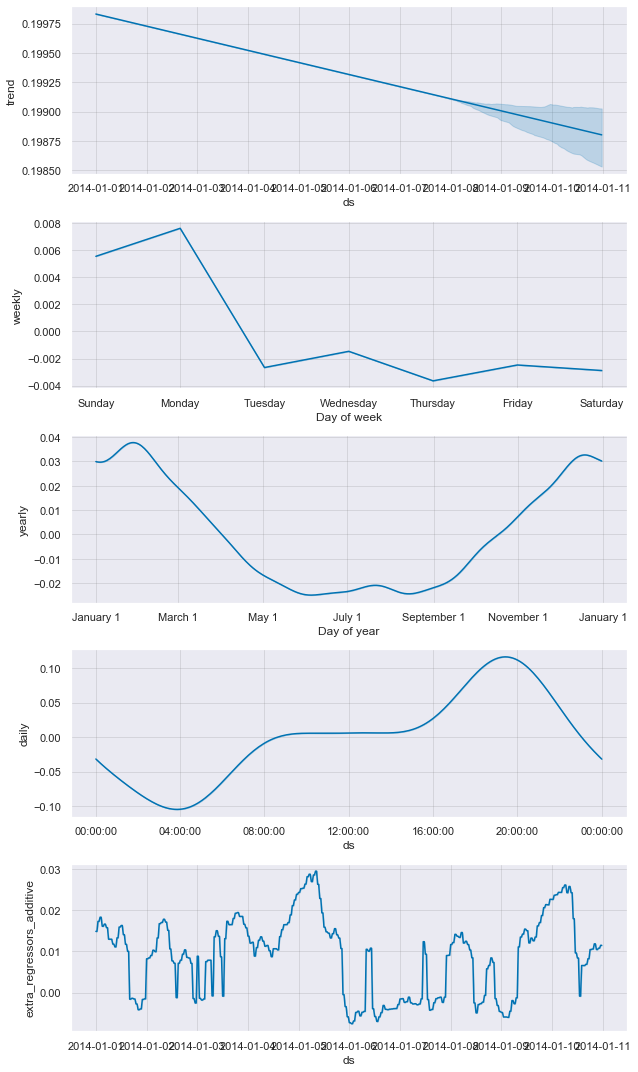

In [700]:
#modelAll.plot_components(forecastAll)
modelAll.plot_components(forecastAll).savefig('./Graphs/mvpcompforcastMain.png');

In [710]:
df_cv= cross_validation(modelAll, horizon='31 days')

#cross_validation(modelAll, horizon="30 days", units, period = NULL, initial = NULL)

INFO:fbprophet:Making 22 forecasts with cutoffs between 2013-01-09 11:30:00 and 2013-11-30 23:30:00


In [711]:

df_cvAdv = cross_validation(modelAdv, horizon='31 days')
df_cvComf = cross_validation(modelComf, horizon='31 days')
df_cvAffl = cross_validation(modelAffl,  horizon='31 days')

INFO:fbprophet:Making 22 forecasts with cutoffs between 2013-01-09 11:30:00 and 2013-11-30 23:30:00
INFO:fbprophet:Making 22 forecasts with cutoffs between 2013-01-09 11:30:00 and 2013-11-30 23:30:00
INFO:fbprophet:Making 22 forecasts with cutoffs between 2013-01-09 11:30:00 and 2013-11-30 23:30:00


In [632]:
#df_cvAffl = cross_validation(modelAffl,  horizon='31 days')

INFO:fbprophet:Making 22 forecasts with cutoffs between 2013-01-09 11:30:00 and 2013-11-30 23:30:00


In [716]:
mae = mean_abs_perc_error(df_cv.y,df_cv.yhat)
print(mae)

0.1227282256636648


In [717]:
mae = mean_abs_perc_error(df_cvAdv.y,df_cvAdv.yhat)
print(mae)

0.10972672428606522


In [718]:
mae = mean_abs_perc_error(df_cvAffl.y,df_cvAffl.yhat)
print(mae)

0.1484858149186395


In [719]:
mae = mean_abs_perc_error(df_cvComf.y,df_cvComf.yhat)
print(mae)

0.13093464659084592


In [618]:
df_p = performance_metrics(df_cv)
df_p

,horizon,mse,rmse,mae,mape,mdape,coverage
0,3 days 02:30:00,0.000577,0.024018,0.018817,0.097508,0.078331,0.851939
1,3 days 03:00:00,0.000578,0.024045,0.018832,0.097758,0.078528,0.851550
2,3 days 03:30:00,0.000579,0.024071,0.018851,0.098018,0.078528,0.851328
3,3 days 04:00:00,0.000580,0.024089,0.018869,0.098280,0.078649,0.850939
4,3 days 04:30:00,0.000581,0.024105,0.018878,0.098490,0.078807,0.850633
...,...,...,...,...,...,...,...
1335,30 days 22:00:00,0.001105,0.033249,0.026521,0.137417,0.113278,0.719271
1336,30 days 22:30:00,0.001103,0.033215,0.026493,0.137335,0.113105,0.720632
1337,30 days 23:00:00,0.001104,0.033226,0.026500,0.137468,0.113603,0.721466
1338,30 days 23:30:00,0.001106,0.033255,0.026529,0.137759,0.113681,0.722133


In [701]:
forecastAll

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-01-01 00:00:00,0.199831,0.177583,0.245612,0.199831,0.199831,0.011664,0.011664,0.011664,-0.031744,...,-0.001470,-0.001470,-0.001470,0.030004,0.030004,0.030004,0.0,0.0,0.0,0.211495
1,2014-01-01 00:30:00,0.199829,0.163464,0.231894,0.199829,0.199829,-0.002174,-0.002174,-0.002174,-0.045594,...,-0.001453,-0.001453,-0.001453,0.030001,0.030001,0.030001,0.0,0.0,0.0,0.197655
2,2014-01-01 01:00:00,0.199827,0.155294,0.217687,0.199827,0.199827,-0.012367,-0.012367,-0.012367,-0.058223,...,-0.001441,-0.001441,-0.001441,0.029997,0.029997,0.029997,0.0,0.0,0.0,0.187460
3,2014-01-01 01:30:00,0.199825,0.142726,0.206814,0.199825,0.199825,-0.024187,-0.024187,-0.024187,-0.070048,...,-0.001432,-0.001432,-0.001432,0.029994,0.029994,0.029994,0.0,0.0,0.0,0.175637
4,2014-01-01 02:00:00,0.199822,0.130939,0.198599,0.199822,0.199822,-0.034238,-0.034238,-0.034238,-0.081120,...,-0.001428,-0.001428,-0.001428,0.029991,0.029991,0.029991,0.0,0.0,0.0,0.165584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,2014-01-10 21:30:00,0.198811,0.269622,0.334588,0.198549,0.199030,0.103130,0.103130,0.103130,0.064586,...,-0.002953,-0.002953,-0.002953,0.031036,0.031036,0.031036,0.0,0.0,0.0,0.301940
476,2014-01-10 22:00:00,0.198809,0.248816,0.312888,0.198545,0.199029,0.081897,0.081897,0.081897,0.043011,...,-0.002949,-0.002949,-0.002949,0.031044,0.031044,0.031044,0.0,0.0,0.0,0.280706
477,2014-01-10 22:30:00,0.198806,0.221939,0.291945,0.198540,0.199027,0.060513,0.060513,0.060513,0.021611,...,-0.002941,-0.002941,-0.002941,0.031052,0.031052,0.031052,0.0,0.0,0.0,0.259320
478,2014-01-10 23:00:00,0.198804,0.206571,0.273945,0.198536,0.199028,0.041295,0.041295,0.041295,0.001682,...,-0.002928,-0.002928,-0.002928,0.031060,0.031060,0.031060,0.0,0.0,0.0,0.240099


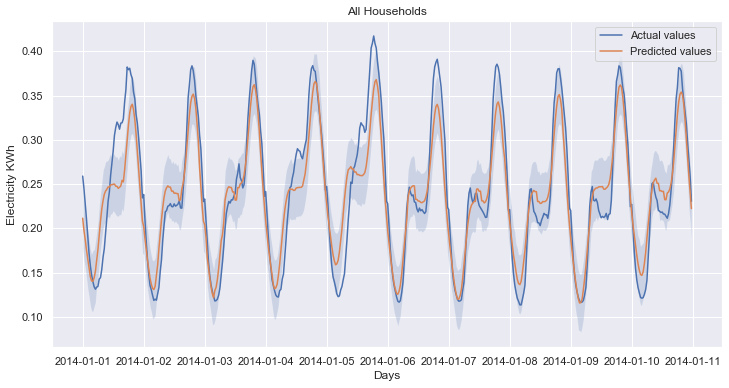

In [708]:

plt.figure(figsize= (12,6))
plt.plot(test_dfAll["ds"][:480], test_dfAll["y"][:480],label='Actual values')
plt.plot(forecastAll["ds"], forecastAll["yhat"],label='Predicted values')
plt.fill_between(forecastAll['ds'],forecastAll['yhat_lower'],forecastAll['yhat_upper'],alpha=0.2)
plt.xlabel('Days')
plt.ylabel('Electricity KWh')
plt.title('All Households')
plt.legend()
plt.savefig('graphs/PredAll10Days.png',transparant = True,dpi = 100);

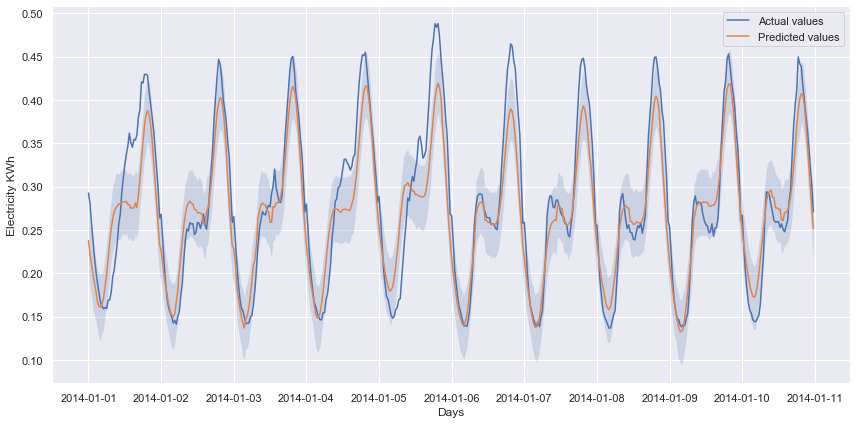

In [704]:
#plt.figure(figsize= (12,6))
fig, ax = plt.subplots(figsize= (12,6))
ax.plot(test_dfAffl["ds"][:480], test_dfAffl["y"][:480],label='Actual values')
ax.plot(forecastAffl["ds"], forecastAffl["yhat"],label='Predicted values')
ax.fill_between(forecastAffl['ds'],forecastAffl['yhat_lower'],forecastAffl['yhat_upper'],alpha=0.2)
plt.xlabel('Days')
plt.ylabel('Electricity KWh')
plt.legend()
plt.tight_layout()
plt.savefig('graphs/PredAffl10DaysNew.png',transparant = True,dpi = 100);

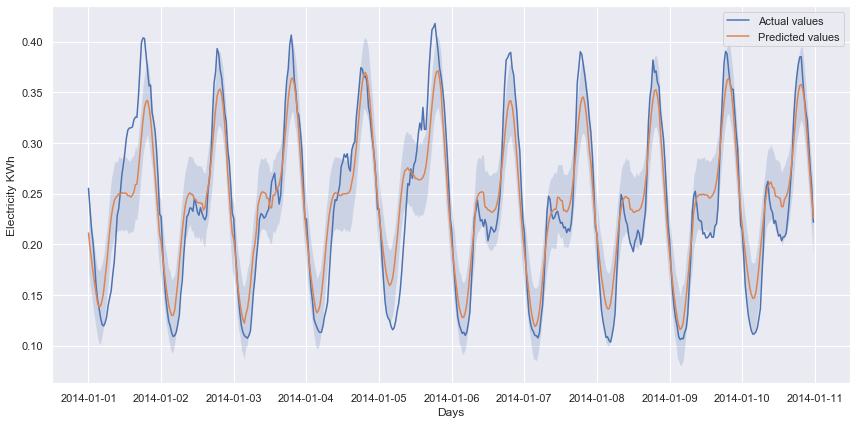

In [705]:
fig, ax = plt.subplots(figsize= (12,6))
ax.plot(test_dfComf["ds"][:480], test_dfComf["y"][:480],label='Actual values')
ax.plot(forecastComf["ds"], forecastComf["yhat"],label='Predicted values')
ax.fill_between(forecastComf['ds'],forecastComf['yhat_lower'],forecastComf['yhat_upper'],alpha=0.2)
plt.xlabel('Days')
plt.ylabel('Electricity KWh')
plt.legend()
plt.tight_layout()
plt.savefig('graphs/PredComf10DaysNew.png',transparant = True,dpi = 100);

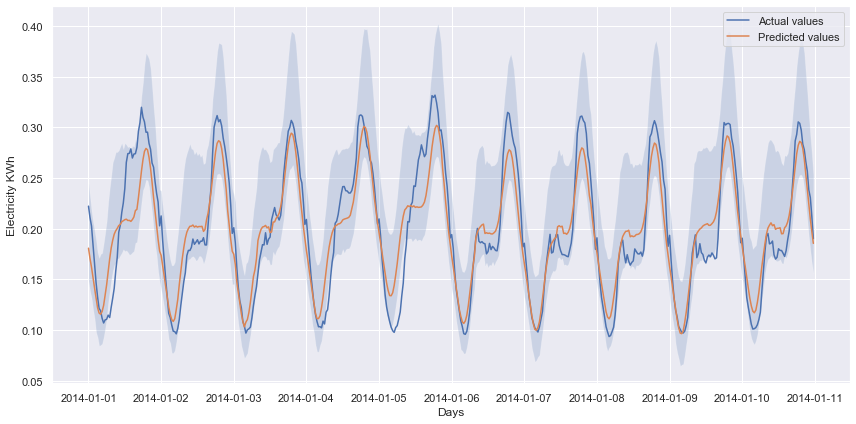

In [706]:
fig, ax = plt.subplots(figsize= (12,6))
ax.plot(test_dfAdv["ds"][:480], test_dfAdv["y"][:480],label='Actual values')
ax.plot(forecastAdv["ds"], forecastAdv["yhat"],label='Predicted values')
ax.fill_between(forecastAdv['ds'],forecastAdv['yhat_lower'],forecastAll['yhat_upper'],alpha=0.2)
plt.xlabel('Days')
plt.ylabel('Electricity KWh')
plt.legend()
plt.tight_layout()
plt.savefig('graphs/PredAdv10DaysNew.png',transparant = True,dpi = 100);

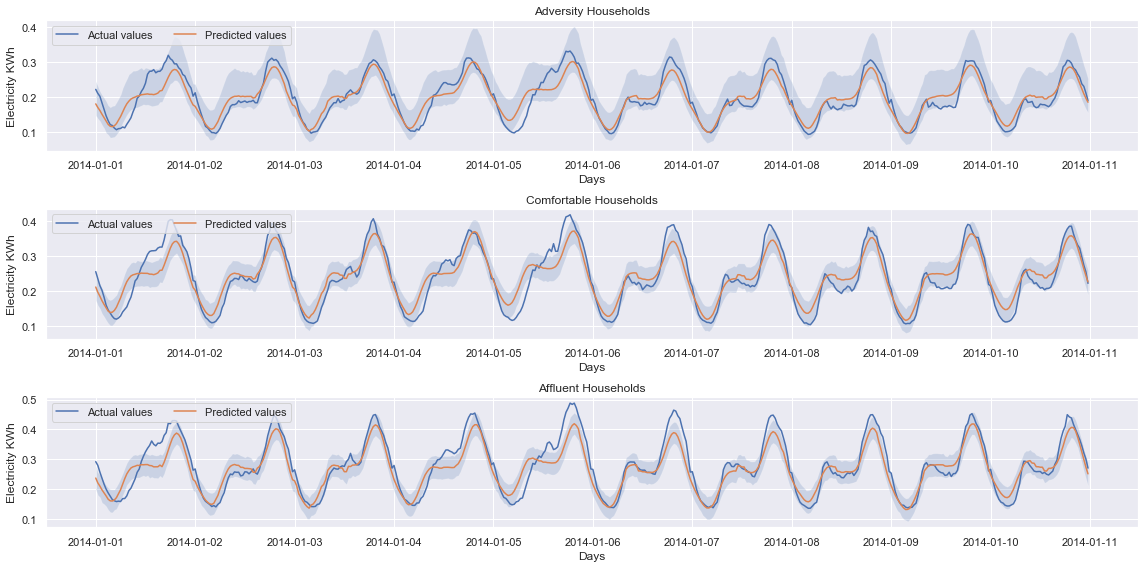

In [727]:
fig = plt.figure(figsize=(16, 8))

ax1 = fig.add_subplot(3, 1, 1)
ax1.plot(test_dfAdv["ds"][:480], test_dfAdv["y"][:480],label='Actual values')
ax1.plot(forecastAdv["ds"], forecastAdv["yhat"],label='Predicted values')
ax1.fill_between(forecastAdv['ds'],forecastAdv['yhat_lower'],forecastAll['yhat_upper'],alpha=0.2)
ax1.set_xlabel('Days')
ax1.set_ylabel('Electricity KWh')
ax1.set_title('Adversity Households')
ax1.legend(loc='upper left',ncol=2)
ax2 = fig.add_subplot(3,1,2)
ax2.plot(test_dfComf["ds"][:480], test_dfComf["y"][:480],label='Actual values')
ax2.plot(forecastComf["ds"], forecastComf["yhat"],label='Predicted values')
ax2.fill_between(forecastComf['ds'],forecastComf['yhat_lower'],forecastComf['yhat_upper'],alpha=0.2)
ax2.set_xlabel('Days')
ax2.set_ylabel('Electricity KWh')
ax2.set_title('Comfortable Households')
ax2.legend(loc='upper left',ncol=2)
ax3 = fig.add_subplot(3,1,3)
ax3.plot(test_dfAffl["ds"][:480], test_dfAffl["y"][:480],label='Actual values')
ax3.plot(forecastAffl["ds"], forecastAffl["yhat"],label='Predicted values')
ax3.fill_between(forecastAffl['ds'],forecastAffl['yhat_lower'],forecastAffl['yhat_upper'],alpha=0.2)
ax3.set_xlabel('Days')
ax3.set_ylabel('Electricity KWh')
ax3.set_title('Affluent Households')
ax3.legend(loc='upper left',ncol=2)

plt.tight_layout()
plt.savefig('./Graphs/PredictionCombined.png')

In [ ]:
# We have to add week and month seasonality
model = Prophet(weekly_seasonality=True)
model.add_seasonality(name="monthly", period=30.5, fourier_order=5)
model.fit(train_df)

In [ ]:
forecast = model.predict(test_df)
forecast.head()

In [ ]:
model.plot(forecast)

In [ ]:
model.plot_components(forecast)


In [606]:

modelAll.plot(modelAll, forecastAll)

AttributeError: 'DataFrame' object has no attribute 'get_figure'